
# FBA QUANT Financial Engineering HW 1

KimSooWan(hse07088@snu.ac.kr)

In [18]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
import time

### Problem1

 An investor deposits $15,000 in a bank today at 6% annual interest. Assuming that no additional deposits are made, and that no money is withdrawn, how large will the account balance be 23 years from today if<br/>
(a) the interest is computed using the simple interest convention?<br/>
(b) the interest is compounded annually?<br/>
(c) the interest is compounded quarterly?<br/>
(d) the interest is compounded monthly?<br/>
(e) the interest is compounded continuously?<br/>
(You should assume that the 6% annual interest rate applies to deposits of any length.)

a)

In [19]:
def simple_interest_convetion(init, years, rate):
    return int(init * (1 + rate * years))
simple_interest_convetion(15000, 23, 0.06)

35700

b,c,d)

In [20]:
def compound(init, years, rate, n) :
    return int(init * (1+rate/n)**(years*n))
print( compound(15000, 23, 0.06, 1))
print( compound(15000, 23, 0.06, 4))
print( compound(15000, 23, 0.06, 12))

57296
59015
59418


e)

In [21]:
def continuous_compound(init, years, rate) :
    return int(init * np.exp(rate*years))
continuous_compound(15000, 23, 0.06)

59623

### Problem 2. 

If you buy a lottery ticket in 50 lotteries, in each of which your chances of winning a prize of 1/100, what is the probability that you will win a prize: <br/>        (a) at least once?<br/>
        (b) exactly twice?<br/>
        (c) at least twice?<br/>
    Calculate both the exact probabilities (using the binomial distribution) and the approximate probabilities (using the Poisson distribution).

- binomial distribution

In [22]:
def binomial_distribution(p, n, result):
    return p**result * (1-p)**(n-result) * (math.factorial(n)/math.factorial(result)/math.factorial(n-result))

    a)

In [23]:
1-binomial_distribution(0.01, 50, 0)

0.39499393286246365

    b)

In [24]:
binomial_distribution(0.01, 50, 2)

0.07561804226543029

    c)

In [25]:
print(1 - binomial_distribution(0.01, 50, 0) - binomial_distribution(0.01, 50, 1))

0.08943531309603114


- poisson distribution

In [26]:
def poission_distribution(_lambda, k):
    return (_lambda**k * np.exp(-_lambda)/math.factorial(k))

    a)

In [27]:
1 - poission_distribution(0.01 * 50, 0)

0.3934693402873666

    b)

In [28]:
poission_distribution(0.01 * 50, 2)

0.07581633246407918

    c)

In [29]:
1- poission_distribution(0.01 * 50, 0) - poission_distribution(0.01 * 50, 1)

0.09020401043104986

### Problem 3.

Consider the following situation: $𝑌∼𝑁(μ,σ^2)$ $(𝑋∣∣𝑌=𝑦)∼𝑁(𝑦,v^2)$ We want to find the distribution of 𝑋.<br/>
(a) Find $𝑓_{𝑋𝑌}(𝑥,𝑦)$ and then use a Law of Total Probability to determine the distribution of 𝑋 $$𝑓_𝑋(𝑥)=\int𝑓_{𝑋|𝑌}( 𝑥 | 𝑦 )𝑓_𝑌(𝑦)𝑑𝑦$$ <br/>
(b) Find the MGF 𝑀𝑋(𝑡) and determine the distribution of 𝑋<br/>
$$𝑀_𝑋(𝑡)=𝐸(𝑒^{𝑡𝑋})=𝐸[𝐸(𝑒^{𝑡𝑋}∣∣𝑌)]$$
where the “inner” expected value, $𝐸(𝑒^{𝑡𝑋}∣∣𝑌)$ is the moment generating function of the random variable $(𝑋∣∣𝑌=𝑦)$

    (a)
$$
\begin{align*}
f_{XY}(x,y) &= f_{X|Y}(x|y)f_Y(y)\\
&=\frac{1}{|v|\sqrt{2\pi}}  e^{-\frac{1}{2}    \left(\frac{x-y}{v}\right)^2}    \frac{1}{|\sigma|\sqrt{2\pi}}e^{-\frac{1}{2}    \left(\frac{y-\mu}{\sigma}\right)^2}\\
&=\frac{1}{|v\sigma|\sqrt{2\pi}}\exp \left(     -\frac{1}{2}\left(    \frac{    \sigma^2x^2-    2\sigma^2 xy + \sigma^2 y^2 + v^2y^2 - 2v^2y\mu + v^2\mu^2    }{v^2 \sigma^2}    \right)   \right)\\
&=\frac{1}{|v\sigma|\sqrt{2\pi}}\exp \left(     -\frac{1}{2}\left(    \frac{  (\sigma^2 + v^2)y^2 - 2(\sigma^2 x + v^2 \mu)y + \sigma^2 x^2 + v^2 \mu^2  }{v^2 \sigma^2}    \right)   \right)\\
&=\frac{1}{|v\sigma|\sqrt{2\pi}}\exp \left(     -\frac{1}{2} \frac{\left( y - \frac{\sigma^2 x + v^2 y}{\sigma^2 v^2}\right)^2}{\frac{v^2 \sigma^2}{\sigma^2+ v^2}}   \right)\exp\left(   -\frac{1}{2}       \left(      \frac{       \sigma^2x^2+v^2\mu^2-            \frac{   (\sigma^2 x + v^2 \mu)^2     }{    \sigma^2+ v^2    }                }{v^2 \sigma^2}         \right)      \right)
\end{align*}
$$

$$
\begin{align*}
f_X(x) &= \int f_{XY}(x,y)dy\\
&= \int \frac{1}{|v\sigma|\sqrt{2\pi}}\exp \left(     -\frac{1}{2} \frac{\left( y - \frac{\sigma^2 x + v^2 y}{\sigma^2 v^2}\right)^2}{\frac{v^2 \sigma^2}{\sigma^2+ v^2}}   \right)\exp\left(   -\frac{1}{2}       \left(      \frac{       \sigma^2x^2+v^2\mu^2-            \frac{   (\sigma^2 x + v^2 \mu)^2     }{    \sigma^2+ v^2    }                }{v^2 \sigma^2}         \right)      \right)dy\\
&= \frac{1}{|v\sigma|\sqrt{2\pi}}\exp\left(   -\frac{1}{2}       \left(      \frac{       \sigma^2x^2+v^2\mu^2-            \frac{   (\sigma^2 x + v^2 \mu)^2     }{    \sigma^2+ v^2    }                }{v^2 \sigma^2}         \right)      \right)\int \exp \left(     -\frac{1}{2} \frac{\left( y - \frac{\sigma^2 x + v^2 y}{\sigma^2 v^2}\right)^2}{\frac{v^2 \sigma^2}{\sigma^2+ v^2}}   \right)dy\\
&= \frac{1}{|v\sigma|\sqrt{2\pi}}\exp\left(   -\frac{1}{2}       \left(      \frac{       \sigma^2x^2+v^2\mu^2-            \frac{   (\sigma^2 x + v^2 \mu)^2     }{    \sigma^2+ v^2    }                }{v^2 \sigma^2}         \right)      \right)\sqrt{\frac{\sigma^2 v^2 }{\sigma^2 + v^2}}\sqrt{2\pi}\\
&= \frac{1}{\sqrt{\sigma^2 + v^2}\sqrt{2\pi}}\exp \left( -\frac{1}{2}     \left(     \frac{\sigma^2 v^2 (x-\mu)^2}{\sigma^2 v^2(\sigma^2 +v^2)}       \right)      \right)\\
&=\frac{1}{\sqrt{\sigma^2 + v^2}\sqrt{2\pi}}\exp \left( -\frac{1}{2}     \left(     \frac{x-\mu}{\sqrt{\sigma^2 +v^2}} \right)^2\right)
\end{align*}
$$

$$
\therefore X \sim N( \mu, \sigma^2 + v^2)
$$

    (b)
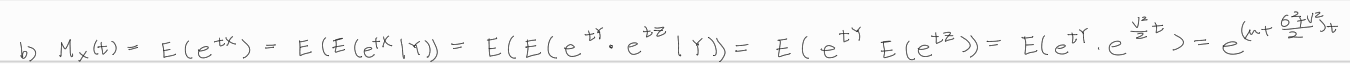

### Problem 4.

Many people believe that the daily change of price of a company’s stock on the stock market is a random variable with mean 0 and variance $\sigma^2$. That is, if $𝑆_𝑡$ represents the price of the stock on the $𝑡$-th day, then $𝑆_𝑡=𝑆_𝑡−1+𝑊_𝑡, 𝑡≥1$
where $𝑊_1,𝑊_2,⋯,$ are independent and identically distributed random variables with mean 0 and variance $\sigma_2$. Suppose that the stock’s price today is 100 and $\sigma_2=1$.<br/>
(a) What can you say about the probability that the stock’s price will exceed 105 after 10 days? (Hint: Chebyshev inequality)<br/>
(b) Suppose $𝑊_1,𝑊_2,⋯,$ are independent and identically distributed Normal random variables with mean 0 and variance $\sigma^2$. What is the probability that the stock’s price will exceed 105 after 10 days?<br/>
(c) Simulate $𝑀=10,000$ trajectories of the stock price $𝑆_𝑡$ for $𝑡=0,1,...,10.$ Plot 10 pairs of trajectories of the stock and calculate the probability that the stock’s price exceeds 105 after 10 days.

    (a)
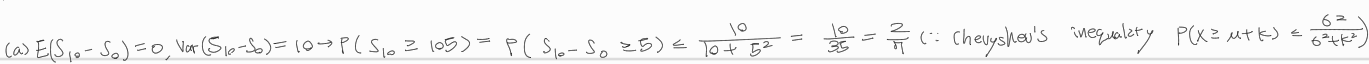

    (b)
$S_{10} - S_0 $ ~ $ N(0, 10)~~~~~~~\therefore P(S_{10} - S_0 \leq 5) = $

In [30]:
1 - scipy.stats.norm(loc = 0, scale = math.sqrt(10)).cdf(5)

0.056923149003329065

    (c)

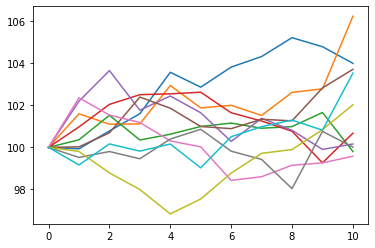

 the probability that the stock’s price exceeds 105 after 10 days : 0.0575


In [31]:
n = 0
for i in range(10000):
    trajectory = [100]
    for j in range(10):
        trajectory.append(trajectory[-1]+np.random.normal(loc=0.0, scale=1.0))
    if(trajectory[-1]>=105):
        n+=1
    if(i<10):
        plt.plot(trajectory)

plt.show()
print(" the probability that the stock’s price exceeds 105 after 10 days : {}".format(n/10000))

### Problem 5.

The IRR is generally calculated using an iterative procedure. Suppose that we define $𝑓(λ)=−𝑎_0+𝑎_1λ+𝑎_2λ^2+⋯+𝑎_𝑛λ^𝑛$, where all $𝑎_𝑖$ are positive and $𝑛>1$. Here is an iterative technique that generates a sequence $λ_0,λ_1,λ_2,…,λ_𝑘,…$ of estimates that converges to the root $\bar\lambda>0$, solving $𝑓(\bar\lambda)=0$. Start with any $λ_0>0$ close to the solution. Assuming $λ_𝑘$ has been calculated, evaluate $$𝑓′(λ_𝑘)=𝑎_1+2𝑎_2λ_𝑘+3𝑎_3λ_𝑘^2+⋯+𝑛𝑎_𝑛λ_𝑘^{𝑛−1}$$ 
and define $$λ_{𝑘+1}=λ_𝑘−\frac{𝑓(λ_𝑘)}{𝑓′(λ_𝑘)}$$
Try the procedure on $𝑓(λ)=−1+λ+λ^2$ starting with $λ_0=1$.<br/>
(a) Write a Python function to calculate $\bar\lambda$ accurate up to 0.000001 and compute the computation time<br/>
(b) Use the Bisection method to calculate $\bar\lambda$ accurate up to 0.000001 and compare the computation time with the result from (a)

In [32]:
def f(_lambda):
    return -1+_lambda+_lambda**2
def derivativeF(_lambda):
    return 1+2*_lambda

    (a)

In [33]:
_lambda = 1
precision = 0.000001
gradient = 1
start = time.time()
while(gradient>precision):
    gradient = f(_lambda)/derivativeF(_lambda)
    _lambda -= gradient
end = time.time()
print("result = {}, compuration time : {}".format(_lambda, (start-end)*1000))

result = 0.618033988749989, compuration time : 0.0


    (b)

In [34]:
high = 1
low = 0
precision = 0.000001
start = time.time()
while(high-low>0.000001):
    mid = (high + low)/2
    if(f(mid)>0):
        high = mid
    elif(f(mid)<0):
        low = mid
    else:
        break
end = time.time()
print("result = {}, compuration time : {}".format((high+low)/2, (start-end)))

result = 0.6180338859558105, compuration time : 0.0


### Problem 6.

Given N points drawn randomly on the circumference of a circle, what is the probability that they are all within a semicircle?

Assume max $\theta$ between N points is $\theta_{max}$, choosing two end points of $\theta_{max}$ will be n(n-1) cases. Place one anywhere on the circle, then probability the other to be placed at $\theta_{max}$ of the initial one became $\frac{d\theta}{2\pi}$. Lastly, probability of other (n-2) points to be placed in $\theta_{max}$ arc of two points is$\frac{\theta}{2\pi}$ each.

$\therefore P(\theta _{max} = \theta ) = n(n-1) \frac{d\theta}{2\pi} (\frac{\theta}{2\pi})^{n-2}$

$P(\theta _{max}|\leq\pi) = \int_{0}^{\pi} n(n-1) \frac{d\theta}{2\pi} (\frac{\theta}{2\pi})^{n-2} = {n \over {2\pi}}[({\theta \over 2\pi})^{n-1}]_0^{\pi} = {n \over 2^{n-1}}$